In [ ]:
https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv("D:/ml/housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
df.shape

(545, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

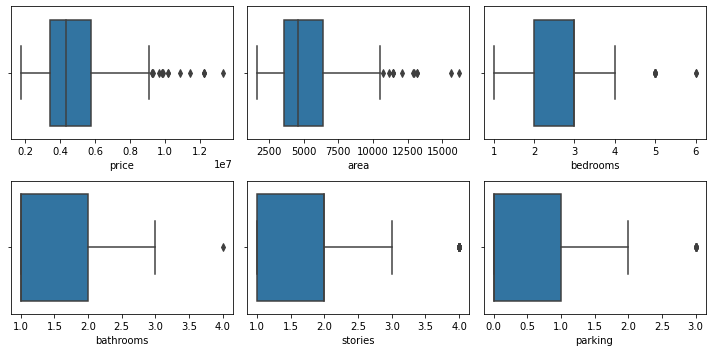

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

<AxesSubplot:xlabel='price'>

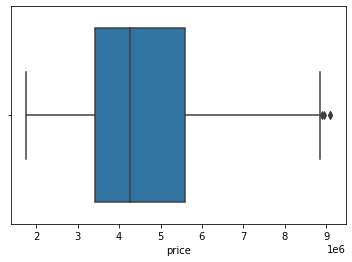

In [7]:
# removing Outliers of Price and area

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]
sns.boxplot(df['price'])

<AxesSubplot:xlabel='area'>

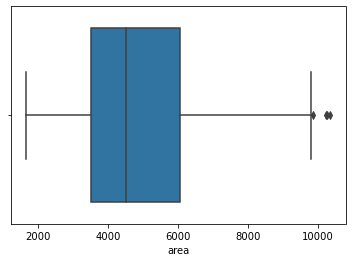

In [8]:

Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)

IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
sns.boxplot(df['area'])

In [9]:
# Binary Encoding the categorical variables 
# mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
# and furnishingstatus has three kinds so one-hot encoding 

feature_list = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

def Binary_encoding(x):
    return x.map({'yes':1, 'no':0 })

df[feature_list] = df[feature_list].apply(Binary_encoding)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [10]:
# for furnishing status use one-hot encoding

Fstatus = pd.get_dummies(df['furnishingstatus'])

Fstatus.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [11]:
Fstatus = pd.get_dummies(df['furnishingstatus'], drop_first=True)
Fstatus.head()

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0


In [12]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [13]:
df = pd.concat([df,Fstatus], axis=1)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [14]:
df.drop(['furnishingstatus'], axis=1 , inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

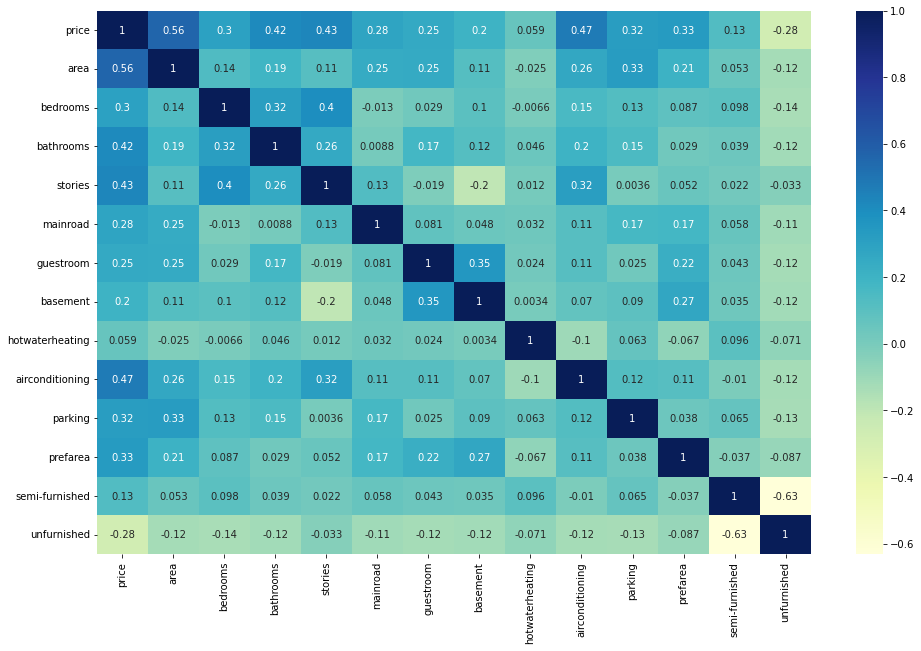

In [16]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [17]:
y_train = df_train.pop('price')
X_train = df_train

In [18]:
from sklearn.feature_selection import RFE # RECURSIVE FEATURE ELIMINATION :For elimination of less important Features
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
rfe = RFE(lm, 6)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [20]:
# combined list of important and unimportant columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', False, 8),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', False, 2),
 ('mainroad', True, 1),
 ('guestroom', False, 3),
 ('basement', False, 5),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 4),
 ('prefarea', True, 1),
 ('semi-furnished', False, 6),
 ('unfurnished', True, 1)]

In [21]:
# list of important columns
col = X_train.columns[rfe.support_]
col

Index(['bathrooms', 'mainroad', 'hotwaterheating', 'airconditioning',
       'prefarea', 'unfurnished'],
      dtype='object')

In [22]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [23]:
X_train_rfe.head()

,bathrooms,mainroad,hotwaterheating,airconditioning,prefarea,unfurnished
148,1,1,0,0,1,0
236,1,1,0,0,1,0
356,2,0,0,1,0,0
425,1,1,0,0,0,0
516,1,0,0,0,0,1


In [24]:
# # Adding a constant variable 

# import statsmodels.api as sm  
# X_train_rfe = sm.add_constant(X_train_rfe)

# X_train_rfe

In [25]:
# lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


In [26]:
# #Let's see the summary of our linear model
# print(lm.summary())


In [27]:
# scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [28]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

y_test = df_test.pop('price')
X_test = df_test

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]


# Making predictions
y_pred = lm.predict(X_test_rfe)

NameError: name 'sm' is not defined

In [29]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)


NameError: name 'y_pred' is not defined

In [30]:
y_pred = rfe.predict(X_train)

In [26]:
y_pred.shape

(361,)

In [20]:
y_test = df_test.pop('price')

In [30]:
lm.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'